In [1]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [2]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [3]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA Available: True
CUDA Version: 12.1
Number of GPUs: 1
GPU Name: Tesla P100-PCIE-16GB


In [4]:
from ultralytics import YOLO
print("YOLO CUDA Available:", torch.cuda.is_available())

YOLO CUDA Available: True


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
#-------------------change here--for--GS-----------------------------#
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8S8JcAyrHcVi1hw4Nmvs")
project = rf.workspace("as-kf9af").project("alpha2beta0.125")
version = project.version(1)
dataset = version.download("yolov8")
#-------------------------------------------------------------------#

# merged-test-2 -> jpgs
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="8S8JcAyrHcVi1hw4Nmvs")
# project = rf.workspace("as-kf9af").project("merged-test-2")
# version = project.version(10)
# dataset = version.download("yolov8")
                

#-------------------------------------------------------------------#
                

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to alpha2beta0.125-1 in yolov8:: 100%|██████████| 1684/1684 [00:00<00:00, 3845.60it/s]


In [6]:
#troca o valor do endereço de validaçao para o de teste
!sed -i 's|^val:.*|val: ../test/images|' {dataset.location}/data.yaml
!cat {dataset.location}/data.yaml
!sed -i 's|^test:.*|test: ../val/images|' {dataset.location}/data.yaml
!cat {dataset.location}/data.yaml

names:
- '1'
- '10'
- '13'
- '14'
- '15'
- '17'
- '19'
- '2'
- '20'
- '21'
- '23'
- '25'
- '4'
- '5'
- '7'
- '9'
nc: 16
roboflow:
  license: CC BY 4.0
  project: alpha2beta0.125
  url: https://universe.roboflow.com/as-kf9af/alpha2beta0.125/dataset/1
  version: 1
  workspace: as-kf9af
test: ../test/images
train: ../train/images
val: ../test/images
names:
- '1'
- '10'
- '13'
- '14'
- '15'
- '17'
- '19'
- '2'
- '20'
- '21'
- '23'
- '25'
- '4'
- '5'
- '7'
- '9'
nc: 16
roboflow:
  license: CC BY 4.0
  project: alpha2beta0.125
  url: https://universe.roboflow.com/as-kf9af/alpha2beta0.125/dataset/1
  version: 1
  workspace: as-kf9af
test: ../val/images
train: ../train/images
val: ../test/images


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True batch=12 pretrained=False

/kaggle/working
100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 313MB/s]
Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/alpha2beta0.125-1/data.yaml, epochs=10, time=None, patience=100, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

In [8]:
!sed -i 's|^val:.*|val: ../test/images|' {dataset.location}/data.yaml
!cat {dataset.location}/data.yaml

names:
- '1'
- '10'
- '13'
- '14'
- '15'
- '17'
- '19'
- '2'
- '20'
- '21'
- '23'
- '25'
- '4'
- '5'
- '7'
- '9'
nc: 16
roboflow:
  license: CC BY 4.0
  project: alpha2beta0.125
  url: https://universe.roboflow.com/as-kf9af/alpha2beta0.125/dataset/1
  version: 1
  workspace: as-kf9af
test: ../val/images
train: ../train/images
val: ../test/images


In [9]:
!cat {dataset.location}/data.yaml

names:
- '1'
- '10'
- '13'
- '14'
- '15'
- '17'
- '19'
- '2'
- '20'
- '21'
- '23'
- '25'
- '4'
- '5'
- '7'
- '9'
nc: 16
roboflow:
  license: CC BY 4.0
  project: alpha2beta0.125
  url: https://universe.roboflow.com/as-kf9af/alpha2beta0.125/dataset/1
  version: 1
  workspace: as-kf9af
test: ../val/images
train: ../train/images
val: ../test/images


In [10]:
# melhor modelo de acordo com validacao
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml imgsz=640

Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/datasets/alpha2beta0.125-1/test/labels.cache... 35
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         35        159      0.586      0.282      0.331      0.182
                     1         10         10      0.475          1      0.777       0.57
                    10          2          4          1          0      0.025     0.0175
                    13          3          3          0          0      0.117     0.0707
                    14          8         10      0.423        0.4      0.471      0.335
                    15          4         10      0.633        0.5      0.668      0.261
                    17          5          6          1          0     0.0995     0.0362
                    19          5       

In [11]:
# ultimo modelo de treinamento
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/last.pt" data={dataset.location}/data.yaml imgsz=640

Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/datasets/alpha2beta0.125-1/test/labels.cache... 35
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         35        159      0.638      0.244      0.319      0.177
                     1         10         10      0.533          1       0.75       0.55
                    10          2          4          1          0     0.0192     0.0134
                    13          3          3          0          0     0.0913      0.064
                    14          8         10      0.953        0.4      0.471      0.297
                    15          4         10      0.859        0.5      0.627      0.286
                    17          5          6          1          0     0.0881     0.0374
                    19          5       

In [12]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" source="/kaggle/working/datasets/alpha2beta0.125-1/valid/images" imgsz=640

Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,008,768 parameters, 0 gradients, 8.1 GFLOPs

image 1/33 /kaggle/working/datasets/alpha2beta0.125-1/valid/images/processed-DJI_20240828142259_0137_D_GS_jpg.rf.59e0e1ca5e0e1f8a7525a2bd65bb7137.jpg: 640x640 1 4, 6.1ms
image 2/33 /kaggle/working/datasets/alpha2beta0.125-1/valid/images/processed-DJI_20240828142338_0152_D_GS_jpg.rf.f1ec6cd66720046966f44ec7040b17eb.jpg: 640x640 (no detections), 6.1ms
image 3/33 /kaggle/working/datasets/alpha2beta0.125-1/valid/images/processed-DJI_20240828142343_0154_D_GS_jpg.rf.ac60c07d58b37359ab93452b9af5f770.jpg: 640x640 (no detections), 5.7ms
image 4/33 /kaggle/working/datasets/alpha2beta0.125-1/valid/images/processed-DJI_20240828142346_0155_D_GS_jpg.rf.783791d1e17e54bb1d93b5e1735475b8.jpg: 640x640 (no detections), 5.6ms
image 5/33 /kaggle/working/datasets/alpha2beta0.125-1/valid/images/processed-DJI_20240828142409_0164_D_GS_jp

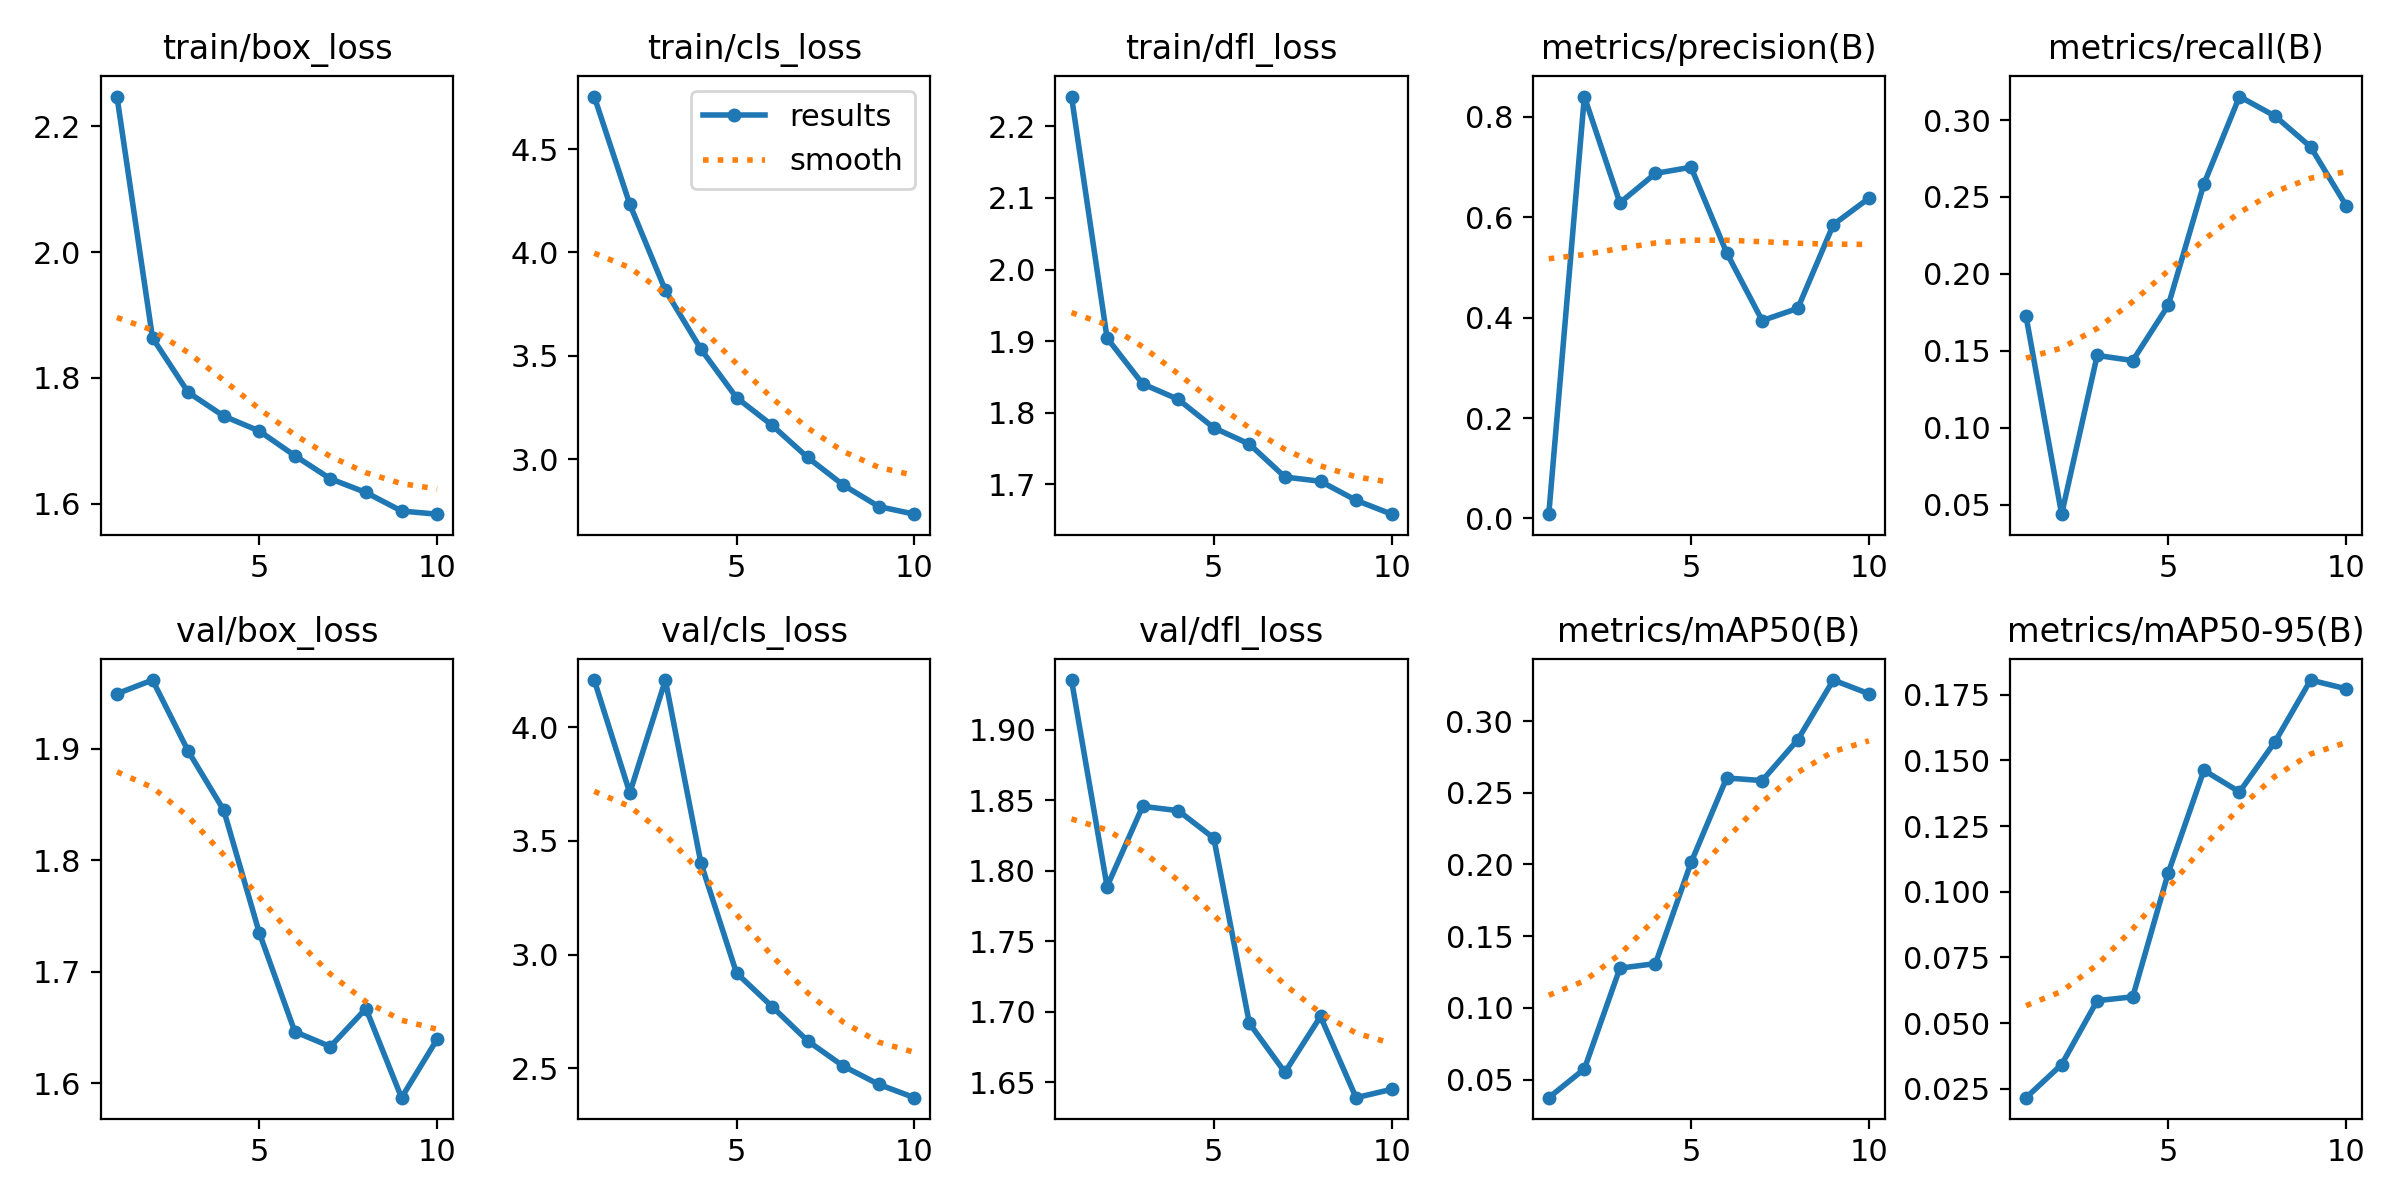

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=1000)